In [1]:
import gym
import numpy as np
import random
import time
import matplotlib.pyplot as plt

# **FrozenLake-v1**

In [2]:
env = gym.make('FrozenLake-v1')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
q_table = np.zeros((env.observation_space.n, env.action_space.n))

In [4]:
# Hyperparameters
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005

num_episodes = 20000
num_steps_per_episode = 100

In [5]:
def q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        for step in range(num_steps_per_episode):
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state, :])

            next_state, reward, done, info = env.step(action)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[next_state,:]))

            reward_episode += reward
            state = next_state

            if done:
                break
        rewards_all.append(reward_episode)
        print(f'Episode {episode} finished')
    return q_table, rewards_all

In [6]:
def sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []

    for episode in range(num_episodes):
        reward_episode = 0.0
        done = False
        state = env.reset()

        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)

        exploration = random.uniform(0,1)
        if exploration < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state, :])

        for step in range(num_steps_per_episode):

            next_state, reward, done, info = env.step(action)


            exploration = random.uniform(0,1)

            if exploration < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(q_table[next_state, :])


            sample = reward + gamma * q_table[next_state,next_action]

            q_table[state, action] = (1 - learning_rate)*q_table[state, action] + learning_rate*sample

            state = next_state
            action = next_action
            reward_episode += reward

            if done:
                break
        rewards_all.append(reward_episode)
        print(f'Episode {episode} finished')
    return q_table, rewards_all

In [7]:
def play(env, q_table, render=False):
    state = env.reset()
    total_reward = 0
    steps = 0
    done = False

    if render:
        plt.axis('off')

    while not done:
        action = np.argmax(q_table[state, :])
        next_state, reward, done, info = env.step(action)
        total_reward += reward
        steps += 1
        if render:
            print(f"{state} --> {next_state}")
            time.sleep(0.5)
            screen = env.render(mode='rgb_array')
            plt.imshow(screen)
            time.sleep(0.5)

        state = next_state

    return (total_reward, steps)

In [8]:
def play_multiple_times(env, q_table, max_episodes):
    success = 0
    list_of_steps = []
    for i in range(max_episodes):
        total_reward, steps = play(env, q_table)

        if total_reward > 0:
            success += 1
            list_of_steps.append(steps)

    print(f'Number of successes: {success}/{max_episodes}')
    print(f'Average number of steps: {np.mean(list_of_steps)}')

In [9]:
q_table, rewards_all = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Streaming output truncated to the last 5000 lines.
Episode 15000 finished
Episode 15001 finished
Episode 15002 finished
Episode 15003 finished
Episode 15004 finished
Episode 15005 finished
Episode 15006 finished
Episode 15007 finished
Episode 15008 finished
Episode 15009 finished
Episode 15010 finished
Episode 15011 finished
Episode 15012 finished
Episode 15013 finished
Episode 15014 finished
Episode 15015 finished
Episode 15016 finished
Episode 15017 finished
Episode 15018 finished
Episode 15019 finished
Episode 15020 finished
Episode 15021 finished
Episode 15022 finished
Episode 15023 finished
Episode 15024 finished
Episode 15025 finished
Episode 15026 finished
Episode 15027 finished
Episode 15028 finished
Episode 15029 finished
Episode 15030 finished
Episode 15031 finished
Episode 15032 finished
Episode 15033 finished
Episode 15034 finished
Episode 15035 finished
Episode 15036 finished
Episode 15037 finished
Episode 15038 finished
Episode 15039 finished
Episode 15040 finished
Episod

In [10]:
start=time.time()
play_multiple_times(env, q_table, 1000)
end = time.time() - start
print("Time:", end)

Number of successes: 717/1000
Average number of steps: 35.98326359832636
Time: 0.7367713451385498


In [11]:
q_table_sarsa, rewards_all_sarsa = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Streaming output truncated to the last 5000 lines.
Episode 15000 finished
Episode 15001 finished
Episode 15002 finished
Episode 15003 finished
Episode 15004 finished
Episode 15005 finished
Episode 15006 finished
Episode 15007 finished
Episode 15008 finished
Episode 15009 finished
Episode 15010 finished
Episode 15011 finished
Episode 15012 finished
Episode 15013 finished
Episode 15014 finished
Episode 15015 finished
Episode 15016 finished
Episode 15017 finished
Episode 15018 finished
Episode 15019 finished
Episode 15020 finished
Episode 15021 finished
Episode 15022 finished
Episode 15023 finished
Episode 15024 finished
Episode 15025 finished
Episode 15026 finished
Episode 15027 finished
Episode 15028 finished
Episode 15029 finished
Episode 15030 finished
Episode 15031 finished
Episode 15032 finished
Episode 15033 finished
Episode 15034 finished
Episode 15035 finished
Episode 15036 finished
Episode 15037 finished
Episode 15038 finished
Episode 15039 finished
Episode 15040 finished
Episod

In [12]:
start = time.time()
play_multiple_times(env, q_table_sarsa, 1000)
end = time.time() - start
print("Time:",end)

Number of successes: 727/1000
Average number of steps: 39.65337001375516
Time: 0.890427827835083


In [13]:
window = 100
average_y = []
for ind in range(len(rewards_all) - window + 1):
    average_y.append(np.mean(rewards_all[ind:ind+window]))

In [14]:
for ind in range(window - 1):
    average_y.insert(0, np.nan)

In [15]:
window = 100
average_y_sarsa = []
for ind in range(len(rewards_all_sarsa) - window + 1):
    average_y_sarsa.append(np.mean(rewards_all_sarsa[ind:ind+window]))

In [16]:
for ind in range(window - 1):
    average_y_sarsa.insert(0, np.nan)

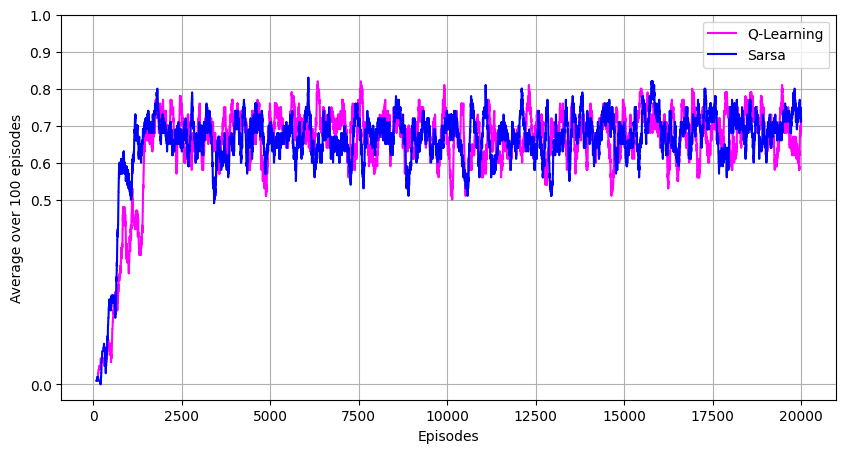

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all)), average_y, color='magenta', label='Q-Learning')
plt.plot(np.arange(len(rewards_all_sarsa)), average_y_sarsa, color='blue', label='Sarsa')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

# **FrozenLake8x8-v1**

In [18]:
env2 = gym.make('FrozenLake8x8-v1',render_mode=None)

In [19]:
gamma = 0.99
learning_rate = 0.3
max_epsilon = 1.0
min_epsilon = 0.01

num_episodes = 60000
num_steps_per_episode = 200

epsilon_decay_rate = 0.0001

In [20]:
q_table, rewards_all = q_learning(env2, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Streaming output truncated to the last 5000 lines.
Episode 55000 finished
Episode 55001 finished
Episode 55002 finished
Episode 55003 finished
Episode 55004 finished
Episode 55005 finished
Episode 55006 finished
Episode 55007 finished
Episode 55008 finished
Episode 55009 finished
Episode 55010 finished
Episode 55011 finished
Episode 55012 finished
Episode 55013 finished
Episode 55014 finished
Episode 55015 finished
Episode 55016 finished
Episode 55017 finished
Episode 55018 finished
Episode 55019 finished
Episode 55020 finished
Episode 55021 finished
Episode 55022 finished
Episode 55023 finished
Episode 55024 finished
Episode 55025 finished
Episode 55026 finished
Episode 55027 finished
Episode 55028 finished
Episode 55029 finished
Episode 55030 finished
Episode 55031 finished
Episode 55032 finished
Episode 55033 finished
Episode 55034 finished
Episode 55035 finished
Episode 55036 finished
Episode 55037 finished
Episode 55038 finished
Episode 55039 finished
Episode 55040 finished
Episod

In [21]:
start=time.time()
play_multiple_times(env2, q_table, 1000)
end = time.time() - start
print("Time:", end)

Number of successes: 826/1000
Average number of steps: 85.1864406779661
Time: 1.8410320281982422


In [22]:
q_table_sarsa, rewards_all_sarsa = sarsa(env2, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Streaming output truncated to the last 5000 lines.
Episode 55000 finished
Episode 55001 finished
Episode 55002 finished
Episode 55003 finished
Episode 55004 finished
Episode 55005 finished
Episode 55006 finished
Episode 55007 finished
Episode 55008 finished
Episode 55009 finished
Episode 55010 finished
Episode 55011 finished
Episode 55012 finished
Episode 55013 finished
Episode 55014 finished
Episode 55015 finished
Episode 55016 finished
Episode 55017 finished
Episode 55018 finished
Episode 55019 finished
Episode 55020 finished
Episode 55021 finished
Episode 55022 finished
Episode 55023 finished
Episode 55024 finished
Episode 55025 finished
Episode 55026 finished
Episode 55027 finished
Episode 55028 finished
Episode 55029 finished
Episode 55030 finished
Episode 55031 finished
Episode 55032 finished
Episode 55033 finished
Episode 55034 finished
Episode 55035 finished
Episode 55036 finished
Episode 55037 finished
Episode 55038 finished
Episode 55039 finished
Episode 55040 finished
Episod

In [23]:
start = time.time()
play_multiple_times(env2, q_table_sarsa, 1000)
end = time.time() - start
print("Time:",end)

Number of successes: 774/1000
Average number of steps: 92.19121447028424
Time: 1.5720903873443604


In [24]:
window = 100
average_y = []
for ind in range(len(rewards_all) - window + 1):
    average_y.append(np.mean(rewards_all[ind:ind+window]))

In [25]:
for ind in range(window - 1):
    average_y.insert(0, np.nan)

In [26]:
window = 100
average_y_sarsa = []
for ind in range(len(rewards_all_sarsa) - window + 1):
    average_y_sarsa.append(np.mean(rewards_all_sarsa[ind:ind+window]))

In [27]:
for ind in range(window - 1):
    average_y_sarsa.insert(0, np.nan)

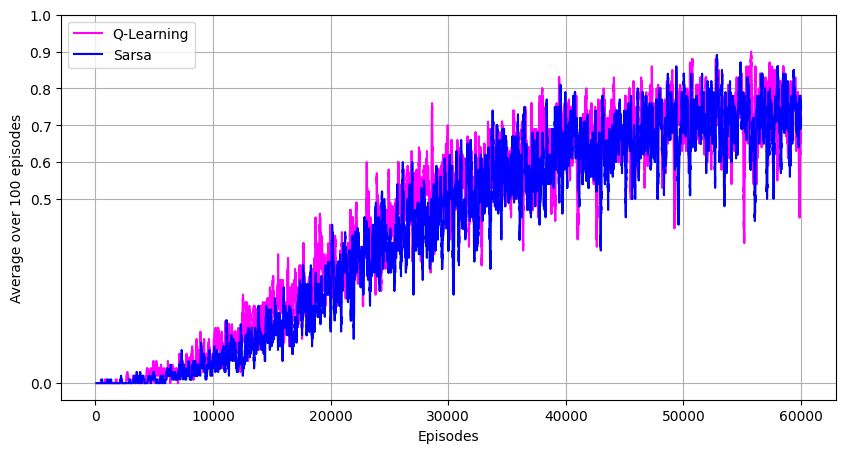

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all)), average_y, color='magenta', label='Q-Learning')
plt.plot(np.arange(len(rewards_all_sarsa)), average_y_sarsa, color='blue', label='Sarsa')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

# **Taxi-v3**

In [29]:
env3 = gym.make('Taxi-v3')

In [30]:
# Hyperparameters
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005

num_episodes = 20000
num_steps_per_episode = 100

In [31]:
q_table, rewards_all = q_learning(env3, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Streaming output truncated to the last 5000 lines.
Episode 15000 finished
Episode 15001 finished
Episode 15002 finished
Episode 15003 finished
Episode 15004 finished
Episode 15005 finished
Episode 15006 finished
Episode 15007 finished
Episode 15008 finished
Episode 15009 finished
Episode 15010 finished
Episode 15011 finished
Episode 15012 finished
Episode 15013 finished
Episode 15014 finished
Episode 15015 finished
Episode 15016 finished
Episode 15017 finished
Episode 15018 finished
Episode 15019 finished
Episode 15020 finished
Episode 15021 finished
Episode 15022 finished
Episode 15023 finished
Episode 15024 finished
Episode 15025 finished
Episode 15026 finished
Episode 15027 finished
Episode 15028 finished
Episode 15029 finished
Episode 15030 finished
Episode 15031 finished
Episode 15032 finished
Episode 15033 finished
Episode 15034 finished
Episode 15035 finished
Episode 15036 finished
Episode 15037 finished
Episode 15038 finished
Episode 15039 finished
Episode 15040 finished
Episod

In [32]:
start=time.time()
play_multiple_times(env3, q_table, 1000)
end = time.time() - start
print("Time:", end)

Number of successes: 1000/1000
Average number of steps: 12.979
Time: 0.3022618293762207


In [33]:
q_table_sarsa, rewards_all_sarsa = sarsa(env3, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Streaming output truncated to the last 5000 lines.
Episode 15000 finished
Episode 15001 finished
Episode 15002 finished
Episode 15003 finished
Episode 15004 finished
Episode 15005 finished
Episode 15006 finished
Episode 15007 finished
Episode 15008 finished
Episode 15009 finished
Episode 15010 finished
Episode 15011 finished
Episode 15012 finished
Episode 15013 finished
Episode 15014 finished
Episode 15015 finished
Episode 15016 finished
Episode 15017 finished
Episode 15018 finished
Episode 15019 finished
Episode 15020 finished
Episode 15021 finished
Episode 15022 finished
Episode 15023 finished
Episode 15024 finished
Episode 15025 finished
Episode 15026 finished
Episode 15027 finished
Episode 15028 finished
Episode 15029 finished
Episode 15030 finished
Episode 15031 finished
Episode 15032 finished
Episode 15033 finished
Episode 15034 finished
Episode 15035 finished
Episode 15036 finished
Episode 15037 finished
Episode 15038 finished
Episode 15039 finished
Episode 15040 finished
Episod

In [34]:
start=time.time()
play_multiple_times(env3, q_table_sarsa, 1000)
end = time.time() - start
print("Time:", end)

Number of successes: 1000/1000
Average number of steps: 12.991
Time: 0.36058568954467773


In [35]:
window = 100
average_y = []
for ind in range(len(rewards_all) - window + 1):
    average_y.append(np.mean(rewards_all[ind:ind+window]))

In [36]:
for ind in range(window - 1):
    average_y.insert(0, np.nan)

In [37]:
window = 100
average_y_sarsa = []
for ind in range(len(rewards_all_sarsa) - window + 1):
    average_y_sarsa.append(np.mean(rewards_all_sarsa[ind:ind+window]))

In [38]:
for ind in range(window - 1):
    average_y_sarsa.insert(0, np.nan)

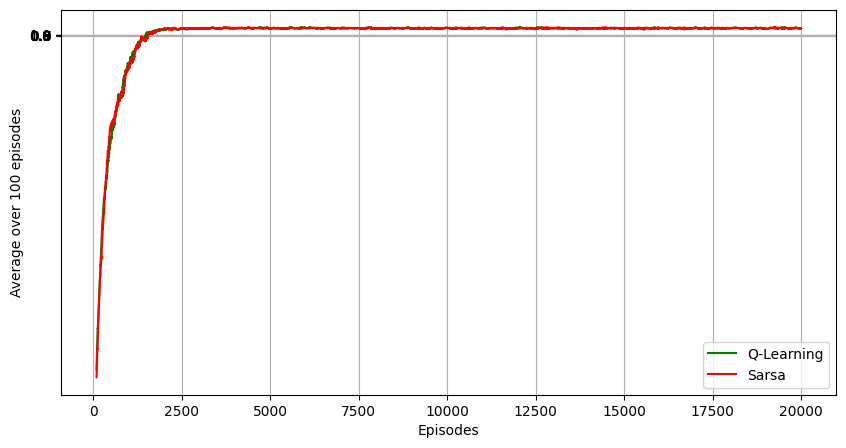

In [39]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all)), average_y, color='green', label='Q-Learning')
plt.plot(np.arange(len(rewards_all_sarsa)), average_y_sarsa, color='red', label='Sarsa')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

# **Kết luận**

- Em so sánh dựa trên tỉ lệ thành công trong 1000 màn, số step trung bình và thời gian chạy.
- Khi so về số step trung bình và thời gian, cả 2 thuật toán cho ra kết quả gần như tương tự nhau.
- Ở map FrozenLake8x8, setting gốc của hyperparameters không cho ra kết quả tốt, cụ thể rằng tốc độ hội tụ tương đối chậm. Em đã thay đổi bằng cách tăng learning_rate = 0.35, giảm decy xuống 0.0001 và num_of_episodes = 60000 để cải thiện kết quả.
- Ta có thể thấy SARSA cho ra tỉ lệ chiến thắng cao hơn so với Q_learning. Tuy nhiên khi nhìn vào biểu đồ, ta thấy trên cùng vài ngàn episodes thì Q_learning đạt được giá trị Reward trung bình cao hơn (ở map đầu tiên Q_learning đã có lúc đạt được gần 0.9).
- Map "Taxi-v3" cho ra kết quả tuyệt đối.